This code is originally to prove the analytical solution of model responce to a non-moving bar.
But you can use this code to tune for suitable parameters.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
%matplotlib inline

In [4]:
def Ay(k,g,alpha,beta,sigma_c, sigma_h,x,n = 1000):
    ans =  0
    for i in range(n+1):
        ans += k/alpha/np.sqrt(np.pi)*(-k*g/alpha/beta)**i/np.sqrt(sigma_c**2+i*sigma_h**2)*np.exp(-x**2/(sigma_c**2+i*sigma_h**2))
    return ans

In [5]:
def K(x,s):
    return (np.exp(-(x/s)**2))/(s*np.sqrt(np.pi))

In [6]:
# Guassian function with mean x0 and standard deviation sigma
def G(x,x0,sigma):
    y = np.exp(-((x-x0)/sigma)**2)
    return(y)

In [7]:
sigma_h = 1.1 # all 'dimention-L' parameters are narmalize by sigma_h
sigma_c = 0.1*sigma_h
sigma_g = 5.*sigma_c

dx = 0.01*sigma_h
xlen = 1000 #spatial 'step' of simulation
xaxis = np.arange(0, xlen)*dx

dis_h = sigma_h
dis_c = sigma_c
h_loc = np.zeros(xlen)
locx = np.arange(dis_h, xlen*dx-dx, dis_h)/dx
h_loc[np.round(locx).astype(int)] = 1
c_loc = np.zeros(xlen)
locx = np.arange(dis_c, xlen*dx-dx, dis_c)/dx
c_loc[np.round(locx).astype(int)] = 1

sum(c_loc)

99.0

In [8]:
klen = sigma_h*3
xx = np.arange(-klen,klen,dx)

KC = K(xx,sigma_c)
KH = K(xx,sigma_h)
KG = K(xx,sigma_g)

In [9]:
s = np.zeros(xlen)
i0 = xlen/2
hw = (sigma_h/4)
s[round(i0-hw/dx):round(i0+hw/dx)] = 50

In [22]:
alpha = 50
beta = 2

k = 500
g = 20

k*g/alpha/beta

100.0

In [23]:
dt = 0.01



nstep = 100
v = 10 # moving bar velocity
#v = 0

y = np.zeros(xlen) # cone cell output
z = np.zeros(xlen) # horizontal cell output
rz = np.zeros(xlen) 
ry = np.convolve(y,KH,'same')*dx # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
output = np.zeros(xlen) 

speak = np.zeros(nstep)
rpeak = np.zeros(nstep)

stm = []
rsp = []
zts = []
tmp = []


for i in range(nstep):
    rs =  np.convolve(s,KC,'same')*dx

    for j in range(xlen):
#         if c_loc[j]:
#             dyj =(-alpha*y[j]+k*(rs[j]-rz[j]))*dt
#             y[j] = y[j]+dyj
#         if h_loc[j]:
#             dzj =(-beta*z[j]+g*y[j])*dt
#             z[j] = z[j]+dzj
            
            
        dyj =(-alpha*y[j]+k*(rs[j]-rz[j]))*dt
        dzj =(-beta*z[j]+g*ry[j])*dt
        y[j] = y[j]+dyj
        z[j] = z[j]+dzj
        
    rz = np.convolve(z,KH,'same')*dx # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    ry = np.convolve(y,KH,'same')*dx # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    output = np.convolve(y,KC,'same')*dx # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    output = y

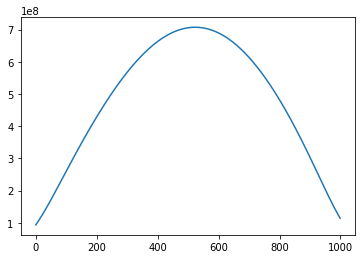

In [24]:
plt.plot(output)
x = np.arange(-xlen/2,xlen/2)*dx
# plt.plot(np.convolve(s,Ay(k,g,alpha,beta,sigma_c, sigma_h,x),'same')*dx)

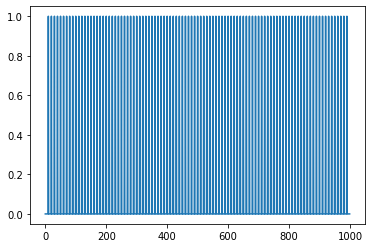

In [33]:
plt.plot(c_loc)

# Result
k/alpha will affect peak height. And (k\*g/alpha/beta) will affect the converging rate, i.e. greater (k*g/alpha/beta) will lead to biphasic outcome.